In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
import time
import warnings

In [46]:
admit=pd.read_csv("../DS InternSavy/Admission_Predict.csv")
# Shape of dataset
admit.shape

(400, 9)

In [47]:
len(admit)


400

In [48]:
admit.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [49]:
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [50]:
admit.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [51]:
admit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [52]:
admit.columns=admit.columns.str.replace(" ","")
admit.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [53]:
# choosing int columns
int_col=admit.select_dtypes(include=["int64"]).columns.tolist()
int_col

['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'Research']

In [54]:
# choosing float columns
float_col=admit.select_dtypes(include=["float64"]).columns.tolist()
float_col

['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']

In [55]:
# unique datatypes
admit.dtypes.value_counts()

int64      5
float64    4
dtype: int64

In [56]:
#Unique values in dataframe
admit.nunique().sort_values(ascending=False)

SerialNo.           400
CGPA                168
ChanceofAdmit        60
GREScore             49
TOEFLScore           29
SOP                   9
LOR                   9
UniversityRating      5
Research              2
dtype: int64

In [57]:
# we don't have null values identified in info().Lets look again..
admit.isnull().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [58]:
# Descriptive Statistics
admit.describe()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [59]:
#Removing unwanted columns
new_admit=admit.drop("SerialNo.",axis=1)
new_admit

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Text(0, 0.5, 'Count')

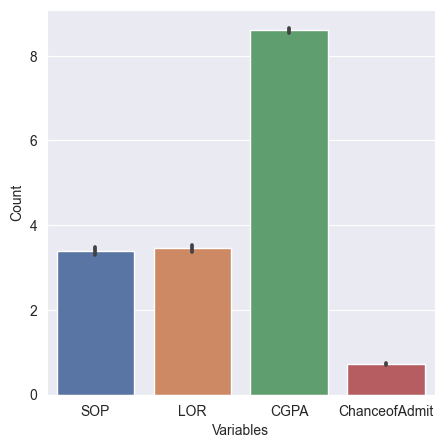

In [60]:
#plotting unique values 
sb.set({"figure.figsize":(5,5)})
sb.barplot(new_admit[['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']])
pt.xlabel("Variables")
pt.ylabel("Count")

In [61]:
# Lets change the values in the Admit column to binary. Where 0 indicates "Not Admitted", 1 indicates "Admitted". 
new_admit["ChanceofAdmit"]=np.where(new_admit["ChanceofAdmit"]>0.5,1,0)
new_admit["ChanceofAdmit"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: ChanceofAdmit, dtype: int32

In [62]:
dummy=new_admit.assign(Original_admit=admit["ChanceofAdmit"])
dummy.head(10)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Original_admit
0,337,118,4,4.5,4.5,9.65,1,1,0.92
1,324,107,4,4.0,4.5,8.87,1,1,0.76
2,316,104,3,3.0,3.5,8.00,1,1,0.72
3,322,110,3,3.5,2.5,8.67,1,1,0.80
4,314,103,2,2.0,3.0,8.21,0,1,0.65
5,330,115,5,4.5,3.0,9.34,1,1,0.90
6,321,109,3,3.0,4.0,8.20,1,1,0.75
7,308,101,2,3.0,4.0,7.90,0,1,0.68
8,302,102,1,2.0,1.5,8.00,0,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0,0.45


In [63]:
# Lets make response and prediction sets
x=new_admit.drop("ChanceofAdmit",axis=1)
y=new_admit["ChanceofAdmit"]
x.head(3)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [64]:
y.head(0)

Series([], Name: ChanceofAdmit, dtype: int32)

In [65]:
y.head(3)

0    1
1    1
2    1
Name: ChanceofAdmit, dtype: int32

In [66]:
# Lets have training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=49)
xtrain.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
300,309,106,2,2.5,2.5,8.00,0
207,310,102,3,3.5,4.0,8.02,1
208,305,106,2,3.0,3.0,8.16,0
71,336,112,5,5.0,5.0,9.76,1
100,322,107,3,3.5,3.5,8.46,1


In [67]:
xtest.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
117,290,104,4,2.0,2.5,7.46,0
302,322,105,2,3.0,3.0,8.45,1
232,312,107,2,2.5,3.5,8.27,0
149,311,106,2,3.5,3.0,8.26,1
202,340,120,5,4.5,4.5,9.91,1


In [68]:
ytrain.head(5)

300    1
207    1
208    1
71     1
100    1
Name: ChanceofAdmit, dtype: int32

In [69]:
ytest.head(5)

117    0
302    1
232    1
149    1
202    1
Name: ChanceofAdmit, dtype: int32

In [70]:
#preprocessing numeric data using standardization
scaler=StandardScaler()
xtrain_scale=scaler.fit_transform(xtrain)
xtest_scale=scaler.transform(xtest)

In [71]:
knn=KNeighborsClassifier(n_neighbors=5)

start_knn=time.time()
knn.fit(xtrain_scale,ytrain)
end_knn=time.time()

ytest_pred=knn.predict(xtest_scale)
acc_knn=accuracy_score(ytest,ytest_pred)*100

train_score_knn=knn.score(xtrain_scale,ytrain)*100

print(knn)
print("Train Accuracy :{:.5f} ".format(train_score_knn))
print("Test Accuracy :{:.5f}".format(acc_knn))
print("Training Time : {:.2f} seconds.".format(end_knn-start_knn))

KNeighborsClassifier()
Train Accuracy :93.92857 
Test Accuracy :93.33333
Training Time : 0.00 seconds.


In [72]:
dt=DecisionTreeClassifier()

start_dt=time.time()
dt.fit(xtrain_scale,ytrain)
end_dt=time.time()

ytest_pred1=dt.predict(xtest_scale)
acc_dt=accuracy_score(ytest,ytest_pred1)*100

train_score_dt=dt.score(xtrain_scale,ytrain)*100


print(dt)
print("Train Accuracy :{:.5f}".format(train_score_dt))
print("Test Accuracy :{:.5f}".format(acc_dt))
print("Training Time : {:.2f} seconds.".format(end_dt-start_dt))

DecisionTreeClassifier()
Train Accuracy :100.00000
Test Accuracy :91.66667
Training Time : 0.00 seconds.


In [73]:
nb=GaussianNB()

start_nb=time.time()
nb.fit(xtrain_scale,ytrain)
end_nb=time.time()

ytest_pred2=nb.predict(xtest_scale)
acc_nb=accuracy_score(ytest,ytest_pred2)*100

train_score_nb=nb.score(xtrain_scale,ytrain)*100

print(nb)
print("Train Accuracy :{:.5f}".format(train_score_nb))
print("Test Accuracy :{:.5f}".format(acc_nb))
print("Training Time : {:.2f} seconds.".format(end_nb-start_nb))

GaussianNB()
Train Accuracy :82.85714
Test Accuracy :90.83333
Training Time : 0.00 seconds.


In [74]:
# Logistic Algo..
log=LogisticRegression()

start_log=time.time()
log.fit(xtrain_scale,ytrain)
end_log=time.time()

ytest_pred3=log.predict(xtest_scale)
acc_log=accuracy_score(ytest,ytest_pred3)*100

train_score_log=log.score(xtrain_scale,ytrain)*100

print(log)
print("Train Accuracy :{:.5f}".format(train_score_log))
print("Test Accuracy :{:.5f}".format(acc_log))
print("Training Time : {:.2f} seconds.".format(end_log-start_log))

LogisticRegression()
Train Accuracy :93.92857
Test Accuracy :95.83333
Training Time : 0.01 seconds.


In [75]:
sv=SVC()

start_sv=time.time()
sv.fit(xtrain_scale,ytrain)
end_sv=time.time()

ytest_pred4=sv.predict(xtest_scale)
acc_sv=accuracy_score(ytest,ytest_pred4)*100

train_score_sv=sv.score(xtrain_scale,ytrain)*100

print(sv)
print("Train Accuracy :{:.5f}".format(train_score_sv))
print("Test Accuracy :{:.5f}".format(acc_sv))
print("Training Time : {:.2f} seconds.".format(end_sv-start_sv))

SVC()
Train Accuracy :92.85714
Test Accuracy :94.16667
Training Time : 0.01 seconds.


In [76]:
rf=RandomForestClassifier()

start_rf=time.time()
rf.fit(xtrain_scale,ytrain)
end_rf=time.time()

ytest_pred5=rf.predict(xtest_scale)
acc_rf=accuracy_score(ytest,ytest_pred5)*100

train_score_rf=rf.score(xtrain_scale,ytrain)*100

print(rf)
print("Train Accuracy :{:.5f}".format(train_score_rf))
print("Test Accuracy :{:.5f}".format(acc_rf))
print("Training Time : {:.2f} seconds.".format(end_rf-start_rf))

RandomForestClassifier()
Train Accuracy :100.00000
Test Accuracy :95.00000
Training Time : 0.27 seconds.


In [77]:
gb=GradientBoostingClassifier()

start_gb=time.time()
gb.fit(xtrain_scale,ytrain)
end_gb=time.time()

ytest_pred6=gb.predict(xtest_scale)
acc_gb=accuracy_score(ytest,ytest_pred6)*100

train_score_gb=gb.score(xtrain_scale,ytrain)*100

print(gb)
print("Train Accuracy :{:.5f}".format(train_score_gb))
print("Test Accuracy :{:.5f}".format(acc_gb))
print("Training Time : {:.2f} seconds.".format(end_gb-start_gb))

GradientBoostingClassifier()
Train Accuracy :100.00000
Test Accuracy :94.16667
Training Time : 0.24 seconds.


In [78]:
model_metrics=[]

model_metrics.append(("Logistic Classifier",train_score_log,acc_log))
model_metrics.append(("DecisionTree Classifier",train_score_dt,acc_dt))
model_metrics.append(("KNeighbour Classifier",train_score_knn,acc_knn))
model_metrics.append(("Random Forest Classifier",train_score_rf,acc_rf))
model_metrics.append(("Support Vector Classifier",train_score_sv,acc_sv))
model_metrics.append(("NaiveBayes Classifier",train_score_nb,acc_nb))
model_metrics.append(("GradientBoosting Classifier",train_score_gb,acc_gb))

metrix=pd.DataFrame(model_metrics,columns=["Model","Train_Accuracy","Test_Accuracy"])
metrix

,Model,Train_Accuracy,Test_Accuracy
0,Logistic Classifier,93.928571,95.833333
1,DecisionTree Classifier,100.000000,91.666667
2,KNeighbour Classifier,93.928571,93.333333
3,Random Forest Classifier,100.000000,95.000000
4,Support Vector Classifier,92.857143,94.166667
5,NaiveBayes Classifier,82.857143,90.833333
6,GradientBoosting Classifier,100.000000,94.166667


In [79]:
BEST_MODEL=metrix.loc[metrix['Train_Accuracy'].idxmax() & metrix['Test_Accuracy'].idxmax()] 
BEST_MODEL

Model             Logistic Classifier
Train_Accuracy              93.928571
Test_Accuracy               95.833333
Name: 0, dtype: object

In [81]:
print("For GridSearchCV(), We have ,")
print("-"*40)
print("Best Parameter :",best_par)
print("Best score :",score)
print("-"*40)

For GridSearchCV(), We have ,
----------------------------------------
Best Parameter : {'C': 0.1, 'penalty': 'l2'}
Best score : 92.5
----------------------------------------


In [82]:
# Classification Report for Tuned ones

report=classification_report(ytest,pred_val)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.93      1.00      0.97       111

    accuracy                           0.93       120
   macro avg       0.97      0.56      0.58       120
weighted avg       0.94      0.93      0.91       120

